# Project

In this project, our aim is to building a model for predicting wine qualities. Our label will be `quality` column. Do not forget, this is a Classification problem!

## Steps
- Read the `winequality.csv` file and describe it.
- Make at least 4 different analysis on Exploratory Data Analysis section.
- Pre-process the dataset to get ready for ML application. (Check missing data and handle them, can we need to do scaling or feature extraction etc.)
- Define appropriate evaluation metric for our case (classification).
- Train and evaluate Decision Trees and at least 2 different appropriate algorithm which you can choose from scikit-learn library.
- Is there any overfitting and underfitting? Interpret your results and try to overcome if there is any problem in a new section.
- Create confusion metrics for each algorithm and display Accuracy, Recall, Precision and F1-Score values.
- Analyse and compare results of 3 algorithms.
- Select best performing model based on evaluation metric you chose on test dataset.


Good luck :)

<h2>Your Name</h2>

# Data

In [117]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier

In [4]:
# Read csv
data=pd.read_csv('./winequality.csv')
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [5]:
# Describe our data for each feature and use .info() for get information about our dataset
# Analyse missing values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


# Exploratory Data Analysis

<AxesSubplot:xlabel='quality', ylabel='count'>

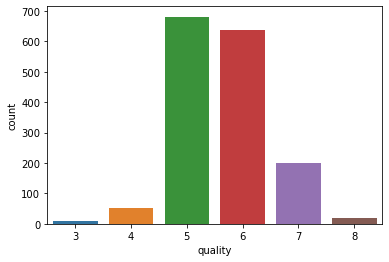

In [9]:
# Our label Distribution (countplot)
sns.countplot(x=data.quality)

<AxesSubplot:xlabel='citric acid'>

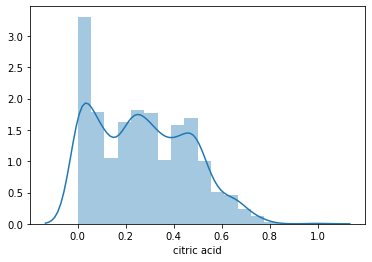

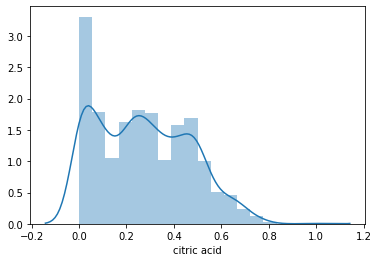

In [5]:
# Example EDA (distplot)
sns.distplot(data['citric acid'])

# Preprocessing

- Are there any duplicated values?
- Do we need to do feature scaling?
- Do we need to generate new features?
- Split Train and Test dataset. (0.7/0.3)

In [18]:
data.columns[:-1]

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

In [100]:
data.drop_duplicates(inplace=True)
x=data[data.columns[:-1]]
y=data[data.columns[-1]]
X_train, X_test, y_train, y_test = train_test_split(x,y,stratify=data['quality'],test_size=0.3,random_state=123)

In [101]:
scaler=MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
# print dataset properties before and after scaling
print("transformed shape: {}".format(X_train_scaled.shape))
print("per-feature minimum before scaling:\n {}".format(X_train.min(axis=0)))
print("per-feature maximum before scaling:\n {}".format(X_train.max(axis=0)))
print("per-feature minimum after scaling:\n {}".format(
X_train_scaled.min(axis=0)))
print("per-feature maximum after scaling:\n {}".format(
X_train_scaled.max(axis=0)))
X_test_scaled = scaler.transform(X_test)
# print test data properties after scaling
print("per-feature minimum after scaling:\n{}".format(X_test_scaled.min(axis=0)))
print("per-feature maximum after scaling:\n{}".format(X_test_scaled.max(axis=0)))

transformed shape: (951, 11)
per-feature minimum before scaling:
 fixed acidity           4.70000
volatile acidity        0.16000
citric acid             0.00000
residual sugar          0.90000
chlorides               0.01200
free sulfur dioxide     3.00000
total sulfur dioxide    6.00000
density                 0.99007
pH                      2.74000
sulphates               0.33000
alcohol                 8.40000
dtype: float64
per-feature maximum before scaling:
 fixed acidity            15.9000
volatile acidity          1.5800
citric acid               1.0000
residual sugar           15.5000
chlorides                 0.6110
free sulfur dioxide      72.0000
total sulfur dioxide    289.0000
density                   1.0032
pH                        4.0100
sulphates                 2.0000
alcohol                  14.9000
dtype: float64
per-feature minimum after scaling:
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
per-feature maximum after scaling:
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
per-featur

# ML Application

- Define models.
- Fit models.
- Evaluate models for both train and test dataset.
- Generate Confusion Matrix and scores of Accuracy, Recall, Precision and F1-Score.
- Analyse occurrence of overfitting and underfitting. If there is any of them, try to overcome it within a different section.

In [107]:
#Tree model
tree = DecisionTreeClassifier(max_depth=4,random_state=0)
tree.fit(X_train_scaled, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test_scaled, y_test)))

Accuracy on training set: 0.627
Accuracy on test set: 0.544


In [111]:
logreg = LogisticRegression(C=1).fit(X_train_scaled, y_train)
print("Training set score: {:.3f}".format(logreg.score(X_train_scaled, y_train)))
print("Test set score: {:.3f}".format(logreg.score(X_test_scaled, y_test)))

Training set score: 0.577
Test set score: 0.600


In [112]:
svm = SVC(C=1)
svm.fit(X_train_scaled, y_train)
# scoring on the scaled test set
print("Scaled test set accuracy: {:.2f}".format(
svm.score(X_test_scaled, y_test)))

Scaled test set accuracy: 0.59


In [113]:
best_score = 0
for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
    # for each combination of parameters, train an SVC
        svm = SVC(gamma=gamma, C=C)
        svm.fit(X_train_scaled, y_train)
        # evaluate the SVC on the test set
        score = svm.score(X_test_scaled, y_test)
    # if we got a better score, store the score and parameters
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}
print("Best score: {:.2f}".format(best_score))
print("Best parameters: {}".format(best_parameters))

Best score: 0.61
Best parameters: {'C': 10, 'gamma': 1}


In [115]:
forest = RandomForestClassifier(n_estimators=10, random_state=2)
forest.fit(X_train_scaled, y_train)
print("Training set score: {:.3f}".format(logreg.score(X_train_scaled, y_train)))
print("Test set score: {:.3f}".format(logreg.score(X_test_scaled, y_test)))

Training set score: 0.577
Test set score: 0.600


# Evaluation

- Select the best performing model and write your comments about why choose this model.
- Analyse results and make comment about how you can improve model.

In [84]:
print(classification_report(y_test, logreg.predict(X_test_scaled),
target_names=[str(x) for x in y_test.unique()]))

              precision    recall  f1-score   support

           6       0.00      0.00      0.00         1
           5       0.00      0.00      0.00        14
           4       0.64      0.78      0.70       177
           7       0.56      0.60      0.58       167
           8       0.50      0.16      0.24        45
           3       0.00      0.00      0.00         4

    accuracy                           0.60       408
   macro avg       0.28      0.26      0.25       408
weighted avg       0.56      0.60      0.57       408



C:\Users\Hp\Anaconda3\envs\PythonCPU\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [85]:
print(classification_report(y_test, svm.predict(X_test_scaled),
target_names=[str(x) for x in y_test.unique()]))

              precision    recall  f1-score   support

           6       0.00      0.00      0.00         1
           5       1.00      0.07      0.13        14
           4       0.67      0.60      0.64       177
           7       0.51      0.72      0.60       167
           8       0.64      0.16      0.25        45
           3       0.00      0.00      0.00         4

    accuracy                           0.58       408
   macro avg       0.47      0.26      0.27       408
weighted avg       0.60      0.58      0.55       408



C:\Users\Hp\Anaconda3\envs\PythonCPU\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [86]:
print(classification_report(y_test, tree.predict(X_test_scaled),
target_names=[str(x) for x in y_test.unique()]))

              precision    recall  f1-score   support

           6       0.00      0.00      0.00         1
           5       0.00      0.00      0.00        14
           4       0.66      0.77      0.71       177
           7       0.54      0.54      0.54       167
           8       0.36      0.27      0.31        45
           3       0.00      0.00      0.00         4

    accuracy                           0.59       408
   macro avg       0.26      0.26      0.26       408
weighted avg       0.55      0.59      0.56       408



C:\Users\Hp\Anaconda3\envs\PythonCPU\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [116]:
print(classification_report(y_test, forest.predict(X_test_scaled),
target_names=[str(x) for x in y_test.unique()]))

              precision    recall  f1-score   support

           6       0.00      0.00      0.00         3
           5       0.00      0.00      0.00        16
           4       0.60      0.71      0.65       173
           7       0.54      0.53      0.54       161
           8       0.41      0.30      0.34        50
           3       0.00      0.00      0.00         5

    accuracy                           0.55       408
   macro avg       0.26      0.26      0.25       408
weighted avg       0.52      0.55      0.53       408



C:\Users\Hp\Anaconda3\envs\PythonCPU\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


The best performing algorithm is logistic reggression with f1 score of 0.60